In [30]:
from quantrocket.license import set_license
set_license("Your license number")

{'licensekey': '3e08........f142', 'software_license': {}}

In [ ]:
from quantrocket.history import create_usstock_db
create_usstock_db("usstock-free-1d", bar_size="1 day", free=True)

In [64]:
from quantrocket.history import collect_history
collect_history("usstock-free-1d")

{'status': 'the historical data will be collected asynchronously'}

In [36]:
from quantrocket.master import get_securities
# by specifying sec_types='STK', we exclude ETFs, which are present in the sample data 
securities = get_securities(vendors="usstock", sec_types="STK")
securities.head()

,Symbol,Exchange,Country,Currency,SecType,Etf,Timezone,Name,PriceMagnifier,Multiplier,Delisted,DateDelisted,LastTradeDate,RolloverDate
Sid,,,,,,,,,,,,,,
FIBBG000B9XRY4,AAPL,XNAS,US,USD,STK,False,America/New_York,APPLE INC,1,1,False,NaT,NaT,NaT
FIBBG000BFWKC0,MON,XNYS,US,USD,STK,False,America/New_York,MONSANTO CO,1,1,True,2018-06-06,NaT,NaT
FIBBG000BKZB36,HD,XNYS,US,USD,STK,False,America/New_York,HOME DEPOT INC,1,1,False,NaT,NaT,NaT
FIBBG000BMHYD1,JNJ,XNYS,US,USD,STK,False,America/New_York,JOHNSON & JOHNSON,1,1,False,NaT,NaT,NaT
FIBBG000BPH459,MSFT,XNAS,US,USD,STK,False,America/New_York,MICROSOFT CORP,1,1,False,NaT,NaT,NaT


In [ ]:
from quantrocket.master import create_universe
create_universe("usstock-free", sids=securities.index.tolist())
filtered_securities = securities[securities.Delisted==False]
# also limit the number of columns for readability
filtered_securities = filtered_securities[["Symbol", "Exchange", "Name", "Delisted"]]
filtered_securities.head()
create_universe("usstock-free-active", sids=filtered_securities.index.tolist())


In [34]:
from quantrocket import get_prices
prices = get_prices("usstock-free-1d", universes="usstock-free", start_date="2023-01-01",end_date="2023-12-31", fields=["Close",])
prices.head()

Sid               FIBBG000B9XRY4  FIBBG000BKZB36  FIBBG000BMHYD1  \
Field Date                                                         
Close 2023-01-03        124.2163        305.5299        171.6388   
      2023-01-04        125.4975        309.2243        173.5075   
      2023-01-05        124.1666        305.1043        172.2264   
      2023-01-06        128.7352        307.0966        173.6231   
      2023-01-09        129.2616        307.3674        169.1248   

Sid               FIBBG000BPH459  FIBBG000GZQ728  FIBBG00B3T3HD3  
Field Date                                                        
Close 2023-01-03        237.0360        102.0452         43.8958  
      2023-01-04        226.6673        102.3422         44.4374  
      2023-01-05        219.9494        104.6320         44.7919  
      2023-01-06        222.5416        105.8967         45.6485  
      2023-01-09        224.7083        103.9230         49.4985

In [41]:
#redefining the column names
import numpy as np
import pandas as pd
sample=prices["FIBBG000B9XRY4"]["Close"]
df= pd.DataFrame(sample)
df=df.reset_index()
df=df.rename(columns={"FIBBG000B9XRY4":"Prices"})
df

,Date,Prices
0,2023-01-03,124.2163
1,2023-01-04,125.4975
2,2023-01-05,124.1666
3,2023-01-06,128.7352
4,2023-01-09,129.2616
...,...,...
245,2023-12-22,193.3533
246,2023-12-26,192.8040
247,2023-12-27,192.9038
248,2023-12-28,193.3333


Text(0, 0.5, 'Prices')

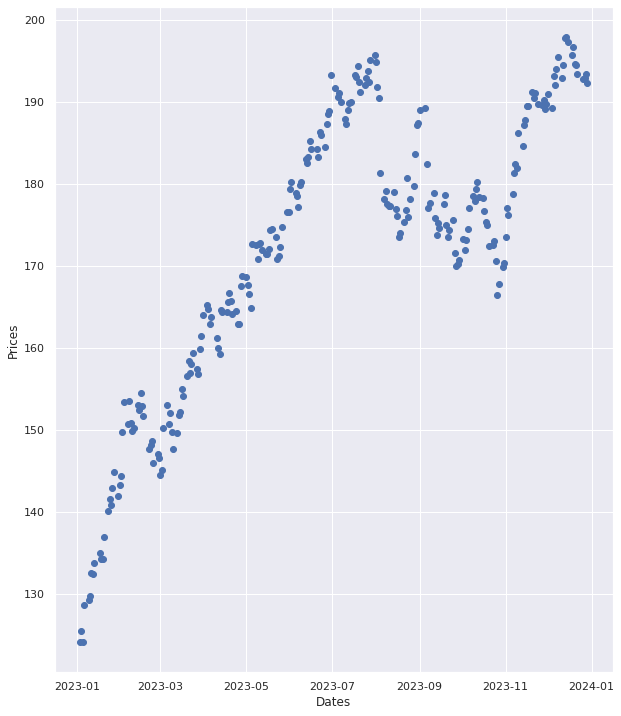

In [42]:
#this is the scatter plot graph of the prices over the time period
import matplotlib.pyplot as plt
plt.figure(figsize=(10,12))
plt.scatter(df.Date,df.Prices)
plt.xlabel("Dates")
plt.ylabel("Prices")

In [65]:
df.describe()

,Prices
count,250.000000
mean,171.901715
std,17.481789
min,124.166600
25%,161.251775
50%,175.020750
75%,186.939325
max,197.857500


,Date,Prices
0,2023-01-03,124.2163
1,2023-01-04,125.4975
2,2023-01-05,124.1666
3,2023-01-06,128.7352
4,2023-01-09,129.2616
...,...,...
245,2023-12-22,193.3533
246,2023-12-26,192.8040
247,2023-12-27,192.9038
248,2023-12-28,193.3333


In [21]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [43]:
#here the return are found assuming the user buys the stock on all days of the year
days=df.shape[0]
returns_of_day=[]
classification=[]
#learning
for i in range(0,days):
    if i==0:
        returns_of_day.append(0)
        classification.append(0)
    else:
        pd1=df.Prices.iloc[i]
        pd0=df.Prices.iloc[i-1]
        vd=((pd1-pd0)/pd0)
        returns_of_day.append(vd)
        if vd >=0.01:
            print(vd,"\t bull \t +1")
            classification.append(1)
        elif vd >-0.01 and vd<0.01:
            print(vd,"\t flat \t 0")
            classification.append(0)
        else:
            print(vd,"\t bare \t -1")
            classification.append(-1)
                

0.010314266324145852 	 bull 	 +1
-0.010604992131317355 	 bare 	 -1
0.036794113714960296 	 bull 	 +1
0.004089013727403191 	 flat 	 0
0.0044568533887869655 	 flat 	 0
0.02111174181304805 	 bull 	 +1
-0.0005988891134932025 	 flat 	 0
0.010119291106223888 	 bull 	 +1
0.008755964202085723 	 flat 	 0
-0.005369889069201903 	 flat 	 0
0.00044382520733554447 	 flat 	 0
0.019220420002873165 	 bull 	 +1
0.02350051742181537 	 bull 	 +1
0.010063019633698222 	 bull 	 +1
-0.004700576657758638 	 flat 	 0
0.014803568982417012 	 bull 	 +1
0.013683980824941603 	 bull 	 +1
-0.02007811836982236 	 bare 	 -1
0.009021016885186315 	 flat 	 0
0.00790062600702964 	 flat 	 0
0.037062448550339945 	 bull 	 +1
0.02440007877669143 	 bull 	 +1
-0.017928852868838087 	 bare 	 -1
0.01924492167255171 	 bull 	 +1
-0.017652987348497063 	 bare 	 -1
-0.006911315390070449 	 flat 	 0
0.002455949738454667 	 flat 	 0
0.018807228899620585 	 bull 	 +1
-0.004225226944218683 	 flat 	 0
0.01390345345325651 	 bull 	 +1
-0.0104294156899

In [44]:
df['Returns']=returns_of_day
df['Class']=classification
df

#creating a copy of the data set, choose the dates
newdf=df.copy()
newdf

,Date,Prices,Returns,Class
0,2023-01-03,124.2163,0.000000,0
1,2023-01-04,125.4975,0.010314,1
2,2023-01-05,124.1666,-0.010605,-1
3,2023-01-06,128.7352,0.036794,1
4,2023-01-09,129.2616,0.004089,0
...,...,...,...,...
245,2023-12-22,193.3533,-0.005547,0
246,2023-12-26,192.8040,-0.002841,0
247,2023-12-27,192.9038,0.000518,0
248,2023-12-28,193.3333,0.002226,0


Text(0, 0.5, 'classes')

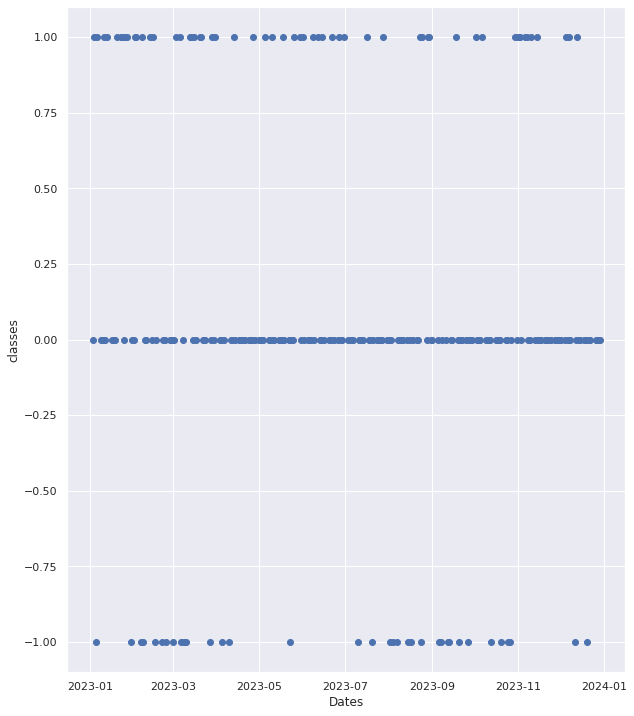

In [45]:
plt.figure(figsize=(10,12))
plt.scatter(df.Date,classification)
plt.xlabel("Dates")
plt.ylabel("classes")


    maximize v(d) decide whether we sell our current stock or buy the next day stock
    s(d)-> is the states classification whther that is bull/bear/flat market
    initially v(d) -> portfolio value is 0 as we decide to buy the next day stock 
     v(d) values +1 if bull , v(d) values -1 if bear



In [46]:
# lets assume that he buys stock for all the entire year without selling the stock from jan 2023
buy_indices=[]
vd=[0] # start value on jan 3
for i in range(0,days-1):
    if classification[i]==0 and classification[i+1]==1:
        vd.append(vd[i]+1)
        buy_indices.append(i+1)
    elif classification[i]==0 and classification[i+1]==-1:
        vd.append(vd[i]-1)
        
    else:
        vd.append(vd[i])
df['Portfolio']=vd

In [47]:
print("We buy on ",len(buy_indices),"days so that our portfolio value increases ")
print("Buy indices are :",buy_indices)

We buy on  41 days so that our portfolio value increases 
Buy indices are : [1, 6, 8, 12, 16, 21, 28, 30, 41, 50, 52, 59, 61, 69, 79, 85, 88, 94, 100, 103, 108, 110, 113, 117, 120, 123, 133, 142, 160, 164, 177, 187, 191, 207, 209, 212, 216, 218, 232, 234, 238]


Text(0, 0.5, 'Portfolio value')

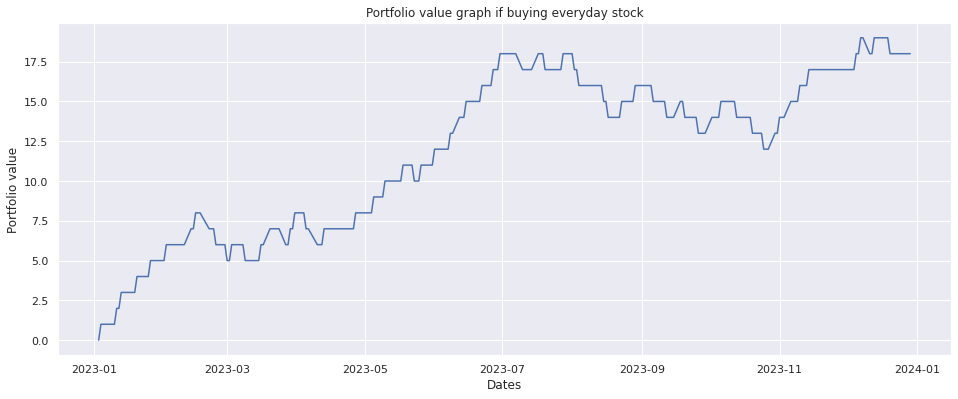

In [48]:
vd
plt.plot(df.Date,vd)
plt.title("Portfolio value graph if buying everyday stock")
plt.xlabel("Dates")
plt.ylabel("Portfolio value")

In [49]:
# state transitions when we buy all the day stocks
transitions = []
for i in range(1, len(classification)):
    transitions.append((classification[i - 1], classification[i]))
transition_df = pd.DataFrame(transitions, columns=['From', 'To'])
transition_probabilities = transition_df.groupby(['From', 'To']).size().unstack().fillna(0)
transition_probabilities = transition_probabilities.div(transition_probabilities.sum(axis=1), axis=0)

print("Transition Probabilities:")
print(transition_probabilities)

Transition Probabilities:
To          -1         0         1
From                              
-1    0.142857  0.742857  0.114286
 0    0.145570  0.594937  0.259494
 1    0.125000  0.678571  0.196429


In [50]:
df

,Date,Prices,Returns,Class,Portfolio
0,2023-01-03,124.2163,0.000000,0,0
1,2023-01-04,125.4975,0.010314,1,1
2,2023-01-05,124.1666,-0.010605,-1,1
3,2023-01-06,128.7352,0.036794,1,1
4,2023-01-09,129.2616,0.004089,0,1
...,...,...,...,...,...
245,2023-12-22,193.3533,-0.005547,0,18
246,2023-12-26,192.8040,-0.002841,0,18
247,2023-12-27,192.9038,0.000518,0,18
248,2023-12-28,193.3333,0.002226,0,18



    another approach
    
    if i invest on jan1 and not on jan2 but proceed on jan3 
    my 'd' is jan1 and 'd+1' is jan3 -> so the r(d) and s(d) may differ
    ie) portfolio value may differ as we decide whether to choose to buy the stock or not
    so the returns values also changes as d -> jan3 anf d-1 -> jan1



    now revisiting the problem statement:
    we should make decision on certain days whether buying that d+1 day stock will result in maximize 
    v(d) portfolio value.
    depending on returns +1 bull , 0 flat , -1 bear
    
    solution:
    while predicting the next day s(d) from the returns, if -1 we choose not to buy the stock of the day d+1


here i try to avoid the bear state by not buying the d+1 day stock , 
by pre calculating the returns and s(d) estimated


In [54]:
price=df['Prices']
i=0
j=0
newreturn=[]
newbuy=[]
while i<len(price):
    if i==0:
        newreturn.append(0)
        newbuy.append(i)
        j=i
        i=i+1
    else:
        pd1=df.Prices.iloc[i]
        pd0=df.Prices.iloc[j]
        vd=((pd1-pd0)/pd0)
        if vd >=0.01:
            print(vd,"\t bull \t +1")
            newreturn.append(1)
            newbuy.append(i)
            i=i+1
            j=j+1
        elif vd >-0.01 and vd<0.01:
            print(vd,"\t flat \t 0")
            newreturn.append(0)
            newbuy.append(i)
            i=i+1
            j=j+1
        else:
            #print(vd,"\t bare \t -1")
            #dont buy
            i=i+1
        

0.010314266324145852 	 bull 	 +1
0.025798920297216994 	 bull 	 +1
0.041033579078431595 	 bull 	 +1
0.00856409125087793 	 flat 	 0
0.025662687139877693 	 bull 	 +1
0.02050020910721613 	 bull 	 +1
0.0095143416594509 	 flat 	 0
0.018963859458986192 	 bull 	 +1
0.003339056576424717 	 flat 	 0
-0.004928447153995866 	 flat 	 0
0.019672775717101562 	 bull 	 +1
0.04317262723982066 	 bull 	 +1
0.033800023223731386 	 bull 	 +1
0.005315140980742855 	 flat 	 0
0.010033407013848104 	 bull 	 +1
0.02869012156145471 	 bull 	 +1
-0.006668886131654312 	 flat 	 0
-0.0034263895472349867 	 flat 	 0
0.054685162145244645 	 bull 	 +1
0.0707602171869668 	 bull 	 +1
0.04331983497337603 	 bull 	 +1
0.025394801405963653 	 bull 	 +1
-0.0026862975364527887 	 flat 	 0
0.011230019980848572 	 bull 	 +1
0.005930554759808938 	 flat 	 0
0.013327545184016703 	 bull 	 +1
0.012679507902418724 	 bull 	 +1
0.00013248278056728535 	 flat 	 0
-0.00013003714226721334 	 flat 	 0
-0.002153732677282525 	 flat 	 0
0.00334745798364200

In [57]:
print("To obtain maximum portfolio value , here we choose not to buy on the bare stock days")
print("Number days we buy the stock to reach maximum portfolio value is ",len(newbuy))

To obtain maximum portfolio value , here we choose not to buy on the bare stock days
Number days we buy the stock to reach maximum portfolio value is  152


In [58]:
buy_indices=[]
vd=[0] # start value on jan 3
for i in range(0,len(newbuy)):
    if newreturn[i]==0 and newreturn[i+1]==1:
        vd.append(vd[i]+1)
        buy_indices.append(i+1)
    elif newreturn[i]==0 and newreturn[i+1]==-1:
        vd.append(vd[i]-1)
        
    else:
        vd.append(vd[i])


In [62]:
print("optimal buy indices ",buy_indices)
print("the portfolio value for this case is:",vd)

optimal buy indices  [1, 5, 8, 11, 15, 19, 24, 26, 33, 137, 139, 146]
the portfolio value for this case is: [0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12]


this approach comparitavely has less portfolio value as we mostly considered the bull and flat state and , since no change in state for few days , makes the portfolio value to remain the same.

Text(0, 0.5, 'Portfolio value')

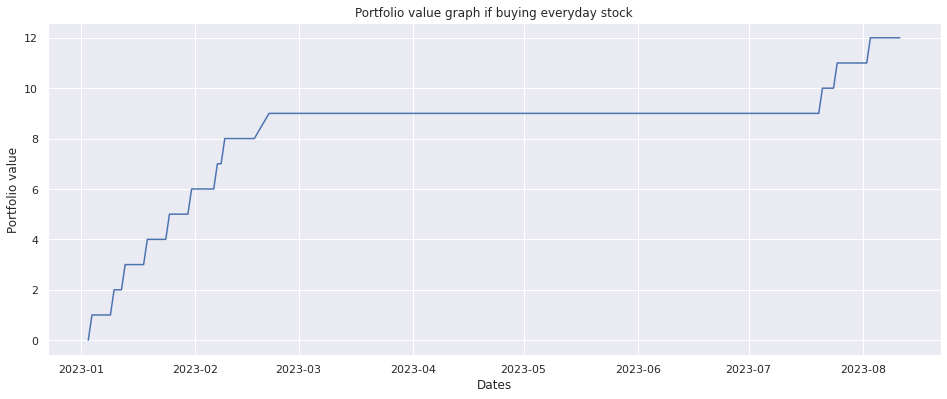

In [69]:
vd
dates=[]
for i in range(len(vd)):
    dates.append(df.Date.iloc[i])
plt.plot(dates,vd)
plt.title("Portfolio value graph if buying everyday stock")
plt.xlabel("Dates")
plt.ylabel("Portfolio value")